In [1]:
import pandas as pd

df = pd.DataFrame({
    'income': [1500, 4000, 6000],
    'loan_amount': [10000, 5000, 2000],
    'risk': ['bad', 'good', 'good']
})

print(df)


   income  loan_amount  risk
0    1500        10000   bad
1    4000         5000  good
2    6000         2000  good


In [9]:
import pandas as pd

train_df = pd.read_csv("../Data/Credit Risk Dataset/training_data.csv")
test_df = pd.read_csv("../Data/Credit Risk Dataset/test_data.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Look at the first few rows
print("\nTraining Data Preview:")
print(train_df.head())

# See all column names and data types
print("\nColumn Info:")
print(train_df.info())

# View unique values for each column (to help define rules)
for col in train_df.columns:
    print(f"\n{col}: {train_df[col].unique()[:10]}")  # show first 10 unique values


Train shape: (1120, 11)
Test shape: (280, 10)

Training Data Preview:
     ID  Age     Sex  Job Housing Saving accounts Checking account  \
0  1122   33    male    1    rent          little         moderate   
1    49   48    male    2     own             NaN              NaN   
2   156   39  female    1     own             NaN         moderate   
3   307   30    male    2     own             NaN         moderate   
4  1288   48    male    2     own          little           little   

   Credit amount  Duration    Purpose  Risk  
0           2384        36    repairs   bad  
1           5190        27    repairs  good  
2            932         6  education  good  
3           2028        12        car  good  
4           1082        12        car   bad  

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID             

Validation Confusion Matrix:
[[40 77]
 [18 89]]

Validation Classification Report:
              precision    recall  f1-score   support

         bad       0.69      0.34      0.46       117
        good       0.54      0.83      0.65       107

    accuracy                           0.58       224
   macro avg       0.61      0.59      0.55       224
weighted avg       0.62      0.58      0.55       224



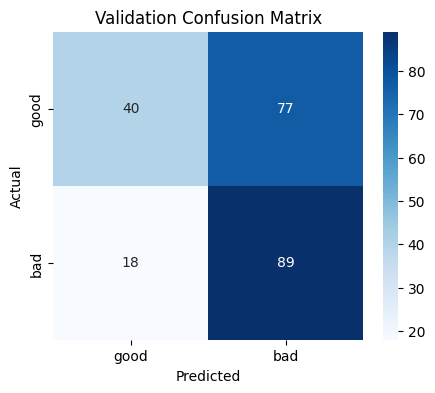


Rule Firing Counts:
Fired_Rule
Rule 1       8
Rule 11      3
Rule 12     17
Rule 2      21
Rule 3     125
Rule 4       6
Rule 5      10
Rule 6       2
Rule 7      19
Rule 9      13
Name: count, dtype: int64


/var/folders/_r/qj9mm28s2dx9k0qvw63xbglh0000gn/T/ipykernel_78701/861257203.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rule_counts.index, y=rule_counts.values, palette='viridis')


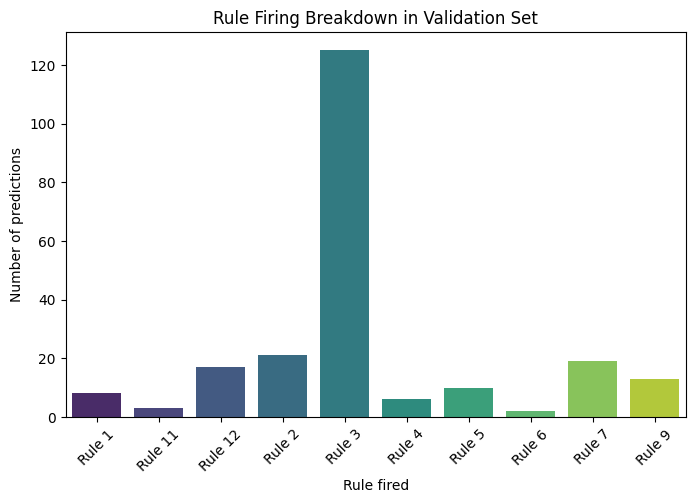


Test Set Predictions Preview:
    ID Predicted_Risk Fired_Rule
0  666           good     Rule 3
1  625           good     Rule 3
2  116            bad     Rule 4
3  479            bad     Rule 5
4  234            bad     Rule 7


In [ ]:
# -----------------------------
# 1. Import libraries
# -----------------------------
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 2. Load dataset
# -----------------------------
train_df = pd.read_csv("../Data/Credit Risk Dataset/training_data.csv")
test_df = pd.read_csv("../Data/Credit Risk Dataset/test_data.csv")

# -----------------------------
# 3. Clean dataset
# -----------------------------
train_df['Saving accounts'] = train_df['Saving accounts'].fillna('unknown')
train_df['Checking account'] = train_df['Checking account'].fillna('unknown')

test_df['Saving accounts'] = test_df['Saving accounts'].fillna('unknown')
test_df['Checking account'] = test_df['Checking account'].fillna('unknown')

# -----------------------------
# 4. Train/Validation split
# -----------------------------
train_sub, val_sub = train_test_split(train_df, test_size=0.2, random_state=42)

# -----------------------------
# 5. Define Rule-Based AI with rule tracking
# -----------------------------
def credit_risk_rule_with_rule(row):
    # Rule 1
    if (row['Saving accounts'] in ['little', 'unknown']) and \
       (row['Credit amount'] > 10000) and (row['Duration'] > 24):
        return 'bad', 'Rule 1'
    
    # Rule 2
    elif (row['Saving accounts'] in ['moderate', 'quite rich', 'rich']) and \
         (row['Checking account'] in ['moderate', 'rich']):
        return 'good', 'Rule 2'
    
    # Rule 3
    elif (row['Housing'] == 'own') and (row['Credit amount'] < 5000):
        return 'good', 'Rule 3'
    
    # Rule 4
    elif (row['Age'] < 25) and (row['Credit amount'] > 5000):
        return 'bad', 'Rule 4'
    
    # Rule 5
    elif (row['Job'] <= 2) and (row['Duration'] > 36):
        return 'bad', 'Rule 5'
    
    # Rule 6
    elif (row['Purpose'] in ['business', 'furniture/equipment']) and (row['Credit amount'] > 8000):
        return 'bad', 'Rule 6'
    
    # Rule 7
    elif (row['Saving accounts'] == 'little') and (row['Checking account'] == 'little'):
        return 'bad', 'Rule 7'
    
    # Rule 8
    elif (row['Age'] > 60) and (row['Duration'] > 24):
        return 'bad', 'Rule 8'
    
    # Rule 9
    elif (row['Job'] <= 2) and (row['Housing'] == 'rent'):
        return 'bad', 'Rule 9'
    
    # Rule 10
    elif (row['Purpose'] == 'education') and (row['Duration'] <= 12) and (row['Credit amount'] <= 5000):
        return 'good', 'Rule 10'
    
    # Rule 11
    elif (row['Purpose'] == 'car') and (row['Housing'] == 'own'):
        return 'good', 'Rule 11'
    
    # Rule 12 (default)
    else:
        return 'good', 'Rule 12'

# -----------------------------
# 6. Apply rules to train/validation
# -----------------------------
train_sub[['Predicted_Risk', 'Fired_Rule']] = train_sub.apply(lambda x: pd.Series(credit_risk_rule_with_rule(x)), axis=1)
val_sub[['Predicted_Risk', 'Fired_Rule']] = val_sub.apply(lambda x: pd.Series(credit_risk_rule_with_rule(x)), axis=1)

# -----------------------------
# 7. Evaluate performance
# -----------------------------
print("Validation Confusion Matrix:")
cm = confusion_matrix(val_sub['Risk'], val_sub['Predicted_Risk'])
print(cm)

print("\nValidation Classification Report:")
print(classification_report(val_sub['Risk'], val_sub['Predicted_Risk']))

# 8. Plot confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['good','bad'], yticklabels=['good','bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# -----------------------------
# 9. Rule firing breakdown
# -----------------------------
rule_counts = val_sub['Fired_Rule'].value_counts().sort_index()
print("\nRule Firing Counts:")
print(rule_counts)

# 10. Bar chart of rules
plt.figure(figsize=(8,5))
sns.barplot(x=rule_counts.index, y=rule_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Number of predictions')
plt.xlabel('Rule fired')
plt.title('Rule Firing Breakdown in Validation Set')
plt.show()

# -----------------------------
# 11. Apply rules to test set (predictions only)
# -----------------------------
test_df[['Predicted_Risk', 'Fired_Rule']] = test_df.apply(lambda x: pd.Series(credit_risk_rule_with_rule(x)), axis=1)

print("\nTest Set Predictions Preview:")
print(test_df[['ID', 'Predicted_Risk', 'Fired_Rule']].head())


/var/folders/_r/qj9mm28s2dx9k0qvw63xbglh0000gn/T/ipykernel_78701/3399718397.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rule_accuracy = val_sub.groupby('Fired_Rule').apply(
/var/folders/_r/qj9mm28s2dx9k0qvw63xbglh0000gn/T/ipykernel_78701/3399718397.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rule_accuracy.index, y=rule_accuracy.values, palette='coolwarm')



Accuracy by Fired Rule:
Fired_Rule
Rule 1     0.625000
Rule 11    0.666667
Rule 12    0.352941
Rule 2     0.428571
Rule 3     0.576000
Rule 4     0.833333
Rule 5     0.700000
Rule 6     0.500000
Rule 7     0.842105
Rule 9     0.461538
dtype: float64


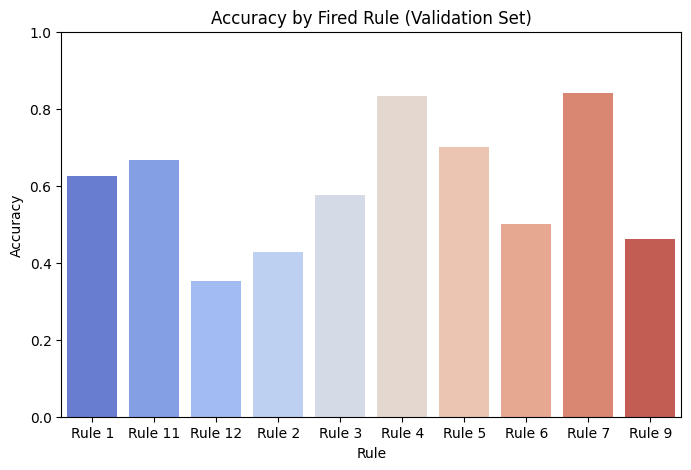

In [24]:
# Accuracy per rule in validation set
rule_accuracy = val_sub.groupby('Fired_Rule').apply(
    lambda df: (df['Predicted_Risk'] == df['Risk']).mean()
).sort_index()

print("\nAccuracy by Fired Rule:")
print(rule_accuracy)

# Optional: visualize
plt.figure(figsize=(8,5))
sns.barplot(x=rule_accuracy.index, y=rule_accuracy.values, palette='coolwarm')
plt.title('Accuracy by Fired Rule (Validation Set)')
plt.xlabel('Rule')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
